In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings # 경고 보기 싫으면
# 시각화 세팅
plt.rcParams['figure.figsize'] = [8, 6] # 가로 10 세로 8
sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

In [3]:
# matplitlib 파이썬으로 기본적인 차트들을 쉽게 그릴 수 있도록 도와주는 시각화 라이브러리
# matplotlib 기반으로 만들어진 통계 데이터 시각화 라이브러리

In [4]:
# % 한글이 깨지는 경우 %
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
  font_name = font_manager.FontProperties(frame='c:/Windows/Fonts/malgun.ttf')
  rc('font',family=font_name)
else:
  # Mac
  rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
# Loading 'Tips' dataset from seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# 항상 습관화 들이자
tips.shape

(244, 7)

In [7]:
# grouping
sum_tips_by_day = tips.groupby('day')['tip'].sum()
sum_tips_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [8]:
x_label = ['Thu','Fri', 'Sat', 'Sun']
x_label_index = np.arange(len(x_label))
x_label_index

array([0, 1, 2, 3])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


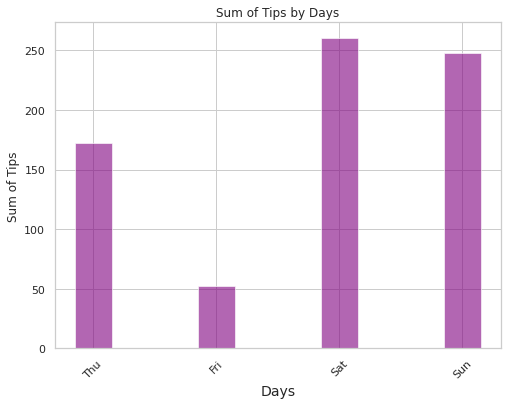

In [9]:
# Bar 차트 이해 및 제작
plt.bar(x_label, sum_tips_by_day,
        color='purple',
        alpha=0.6,
        width=0.3,
        align='center')
plt.title('Sum of Tips by Days')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Sum of Tips', fontsize=12)
plt.xticks(x_label_index,
           x_label,
           rotation=45)
plt.show()

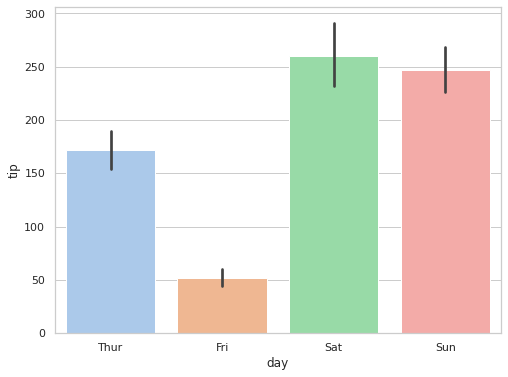

In [10]:
# seaborn을 활용한 시각화
sns.barplot(data=tips, # dataFrame 명시
            x='day',
            y='tip',
            estimator=np.sum)
plt.show()

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


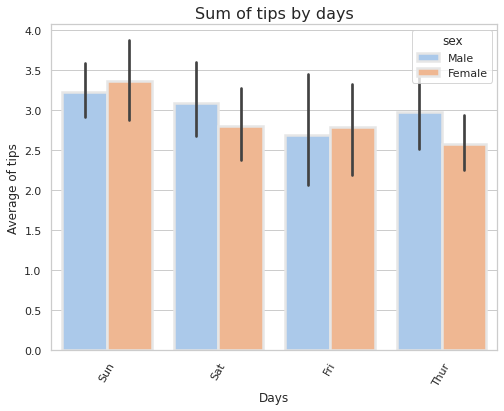

In [11]:
# hue는 색으로 비교해서 보여준다.
# estimator에 원하는 것을 지정해서 보기
sns.barplot(data=tips,
            x='day',
            y='tip',
            estimator=np.average,
            hue='sex',
            palette='pastel',
            order=['Sun','Sat','Fri','Thur'],
            edgecolor='.9', # 바 모서리 선명도
            linewidth=2.5) # 선 모서리 두께
plt.title('Sum of tips by days', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Average of tips')
plt.xticks(rotation=60)
plt.show()

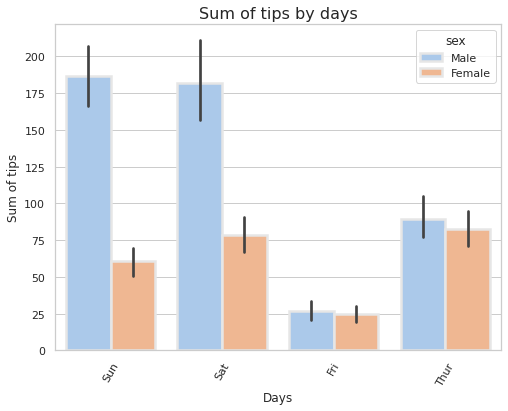

In [12]:
# hue는 색으로 비교해서 보여준다.
# estimator에 원하는 것을 지정해서 보기
sns.barplot(data=tips,
            x='day',
            y='tip',
            estimator=np.sum,
            hue='sex',
            palette='pastel',
            order=['Sun','Sat','Fri','Thur'],
            edgecolor='.9', # 바 모서리 선명도
            linewidth=2.5) # 선 모서리 두께
plt.title('Sum of tips by days', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum of tips')
plt.xticks(rotation=60)
plt.show()

In [13]:
# pie 차트 이해 및 제작
# matplotlib 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
ratio_tip_by_day = sum_tip_by_day/sum_tip_by_day.sum()
ratio_tip_by_day

day
Thur    0.234875
Fri     0.071024
Sat     0.355942
Sun     0.338159
Name: tip, dtype: float64

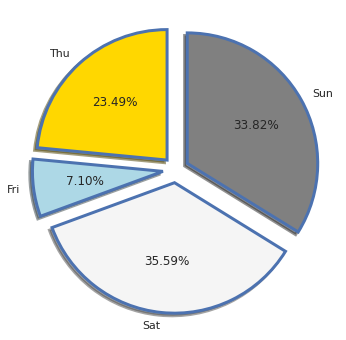

In [30]:
x_label = ['Thu','Fri','Sat','Sun']
plt.pie(ratio_tip_by_day,
        labels=x_label,
        autopct='%.2f%%',
        startangle=90,
        counterclock=True,
        explode=[0.1]*4,
        shadow=True,
        colors=['gold','lightblue','whitesmoke','grey'],
        wedgeprops={'width':1.0, 'edgecolor': 'b', 'linewidth': 3})
plt.show()

In [15]:
# Line 차트 이해 및 제작
# Matplotlib을 활용해서 시각화
# Line 차트 예제를 위해, tips 데이터에 가상 시간 컬럼 추가하기

sun_tips = tips[tips['day']=='Sun']
sun_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [ ]:
# 현재 서버 시간을 얻기 위해 datetime 라이브러리 사용
import datetime
date = []
today = datetime.date.today()
date.append(today)

for time in range(sun_tips.shape[0]-1):
  today += datetime.timedelta(1) # 하루 씩 추가
  date.append(today)
date

In [17]:
sun_tips['date'] = date
sun_tips

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2021-11-18
1,10.34,1.66,Male,No,Sun,Dinner,3,2021-11-19
2,21.01,3.50,Male,No,Sun,Dinner,3,2021-11-20
3,23.68,3.31,Male,No,Sun,Dinner,2,2021-11-21
4,24.59,3.61,Female,No,Sun,Dinner,4,2021-11-22
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2022-01-28
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2022-01-29
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2022-01-30
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2022-01-31


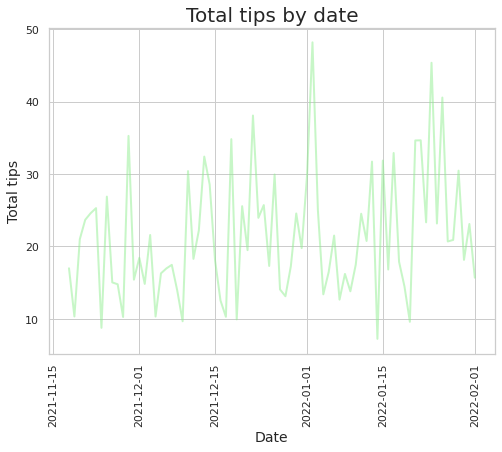

In [31]:
# line chart
plt.plot(sun_tips['date'], sun_tips['total_bill'],
         linestyle='-', # -가 default
         linewidth=2, # 라인 두께
         color='lightgreen', # 색상
         alpha=0.5)  # 투명도
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total tips', fontsize=14)
plt.title('Total tips by date', fontsize=20)
plt.show()

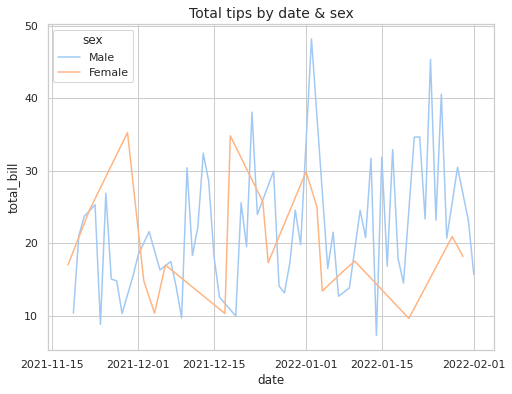

In [19]:
# seaborn을 활용한 시각화
sns.lineplot(data=sun_tips,x='date',y='total_bill',
             hue='sex')
plt.title('Total tips by date & sex', fontsize=14)
plt.show()

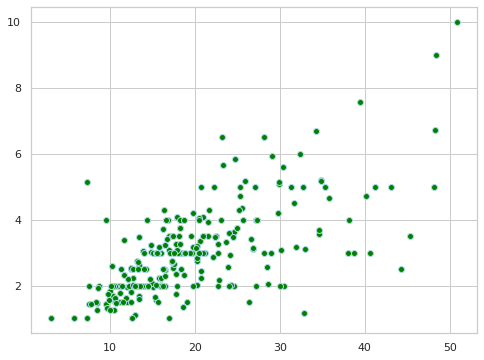

In [20]:
# Scatter 차트 이해 및 제작

# 기온에 따른 아이스크림 판매도
plt.scatter(tips['total_bill'],tips['tip'],
            color='green',
            edgecolor='lightblue',
            linewidth=1)
plt.show()

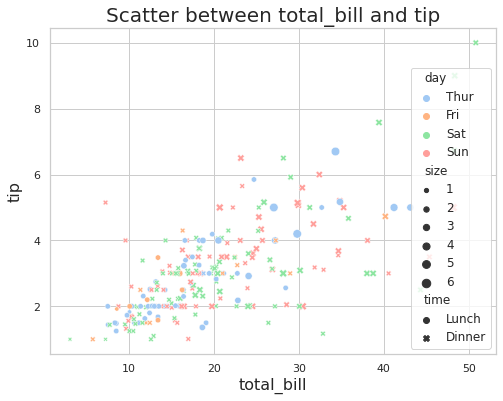

In [21]:
# seaborn을 활용한 시각화
# style=> 모양 구분으로 다른 변수와 비교
# hue=> 색깔 구분으로 다른 변수와 비교
# size=> 크기 구분으로 다른 변수와 비교
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                hue='day',
                style='time',
                size='size')
plt.title('Scatter between total_bill and tip', fontsize=20)
plt.xlabel('total_bill', fontsize=16)
plt.ylabel('tip', fontsize=16)
plt.show()

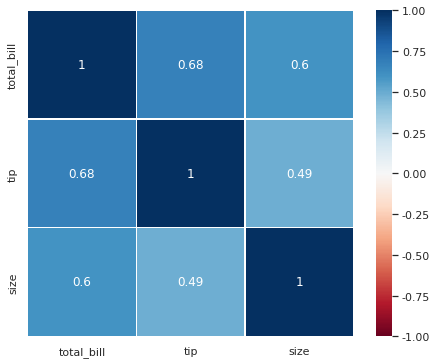

In [22]:
# Heat Map 차트 이해 및 제작
# seaborn을 활용한 시각화
# 1에 가까우면 양의 상관관계 0에 가까우면 상관이 없을 수도 있을 수도
# -1에 가까우면 음의 상관관계
sns.heatmap(tips.corr(),
            annot=True, # 박스 안 corr 값 표시할지 말지
            square=True, # 박스를 정사각형으로 할지 말지
            vmin=-1,vmax=1, #최소 최대 값 지정
            linewidth=.5, # 라인 두께 지정
            cmap='RdBu') # 색상 스타일 선택
plt.show()

In [23]:
# 상관 관계를 알 수 있는 연속형 변수에  대해서만 구함
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


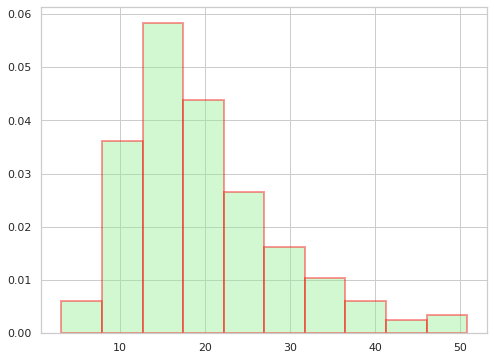

In [24]:
# Histogram 차트 이해 및 제작
# matplotlib을 활용한 시각화
# bins default=10
# density=True하면 비율로 확인 가능

plt.hist(tips['total_bill'],
         bins=10,
         density=True,
         alpha=0.4,
         color='lightgreen',
         edgecolor='red',
         linewidth=2) 
plt.show()

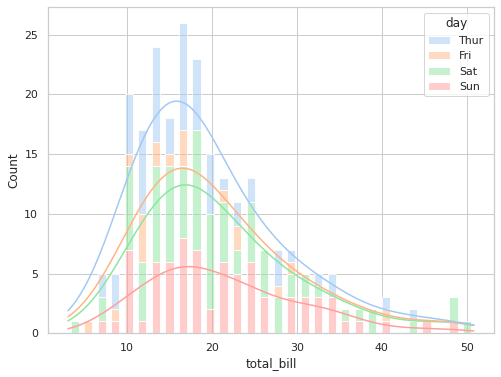

In [25]:
# seaborn을 통한 시각화
# kde = kernel density estimator
sns.histplot(data=tips,
             x='total_bill',
             bins=30,
             kde=True,
             hue='day',
             multiple='stack',
             shrink=0.6)
plt.show()

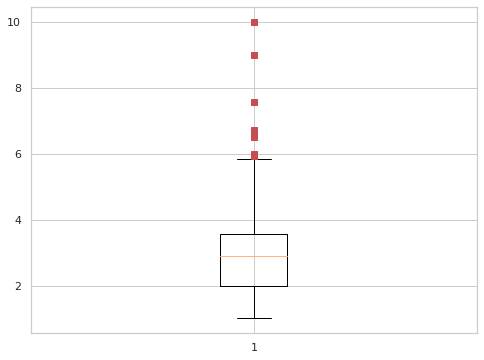

In [26]:
# Box 차트 이해 및 제작

# Box 차트 밖으로 나가는 데이터를 outliers, 이상치
plt.boxplot(tips['tip'],
            sym='rs')
plt.show()

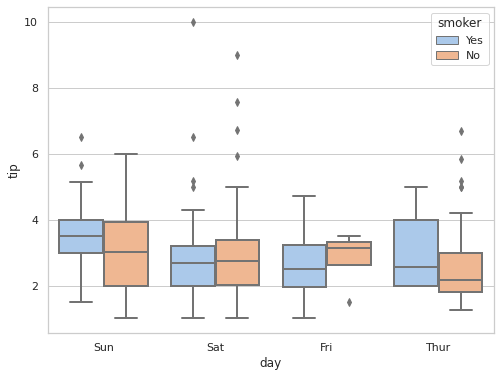

In [27]:
# seaborn을 활용한 시각화
sns.boxplot(data=tips,
            x='day',
            y='tip',
            hue='smoker',
            linewidth=2,
            order=['Sun','Sat','Fri','Thur'])
plt.show()